# <u>Phase 1 Project: Movies:</u>
#### Jesse Markowitz's Working Jupyter Notebook

## Question/Exploration ideas:

1. Popular actors correlate with high ratings? (Measure popularity by how many movies they've been cast in?)
2. Look for popular words in ratings/reviews to ID plot points/content?
3. Comparing popularity/ratings of series/sequels/franchies vs stand-alone films.
4. By studio, director, or writer

## Import the IMDB files

In [4]:
import pandas as pd

title_basics_df = pd.read_csv('../Data/imdb.title.basics.csv')
ratings_df = pd.read_csv('../Data/imdb.title.ratings.csv.gz')

# We decided not to analyze the cast or crew, or use the international movie names

# crew_df = pd.read_csv('imdb.title.crew.csv.gz')
# name_df = pd.read_csv('./unzippedData/imdb.name.basics.csv')
# principals_df = pd.read_csv('./unzippedData/imdb.title.principals.csv')
# title_akas_df = pd.read_csv('./unzippedData/imdb.title.akas.csv')

In [5]:
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [6]:
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
title_basics_df.shape

(146144, 6)

## Join the dataframes into one overall dataframe

The `tconst` and `nmcost` are the primary keys for movie titles and crew names. We will not continue using `title_akas_df` because it contains only the movie titles given in other countries, but not much other useful information.

In [8]:
movies_info_df = title_basics_df.merge(ratings_df, how='left', on='tconst')
movies_info_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


## Clean the data
**Remove columns and rows that won't be needed from `movies_info_df`**

In [9]:
movies_info_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [10]:
movies_info_df.shape

(146144, 8)

Based on the amount of `NaN` values, it seems like only about half of the movies listed in `titles_basics_df` have ratings available.

In [11]:
movies_info_df.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
averagerating      72288
numvotes           72288
dtype: int64

The <a href="https://www.imdb.com/interfaces/">documentation from IMDB</a> says that `'primary_title'` is the most popular or commonly used title (`'original_title'` is different especially for foreign films) , so we drop `'original_title'`.

In [12]:
movies_info_df.drop('original_title', axis=1, inplace=True)

In [13]:
movies_info_df.head()

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


Let's look at the release dates given by `'start_year'`:

In [14]:
movies_info_df.start_year.value_counts()

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: start_year, dtype: int64

Some of the movies listed in this data are slated for release in the future. (One movie, titled "100 Years" has a release date of 2115!) We drop these movies as there is no available data for their gross box office revenue.

We also drop data from 2020 and 2021 as these data are heavily affected by the covid-19 pandemic. We instead build our model using only pre-pandemic data.

In [15]:
movies_info_df.drop(movies_info_df[movies_info_df['start_year'] > 2019].index, inplace=True)
movies_info_df.start_year.value_counts()

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
Name: start_year, dtype: int64

In [16]:
movies_info_df.head()

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [17]:
movies_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145081 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           145081 non-null  object 
 1   primary_title    145081 non-null  object 
 2   start_year       145081 non-null  int64  
 3   runtime_minutes  114316 non-null  float64
 4   genres           139722 non-null  object 
 5   averagerating    73856 non-null   float64
 6   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 8.9+ MB


In [18]:
movies_info_df.isna().sum()

tconst                 0
primary_title          0
start_year             0
runtime_minutes    30765
genres              5359
averagerating      71225
numvotes           71225
dtype: int64

## Analyzing genres based on top movies
**Use the top movies found based on ROI, budget, and revenue, for movies released between 2010-2019 (inclusive).**

Import `top_movies_list` to filter for top movie genres

In [19]:
with open('../Data/top_movie_list.txt') as f:
    top_movies_list = f.readlines()
top_movies_list = [movie.strip() for movie in top_movies_list]
top_movies_list

['Avatar',
 'Star Wars Ep. VII: The Force Awakens',
 'Avengers: Infinity War',
 'The Avengers',
 'Jurassic World',
 'Black Panther',
 'Titanic',
 'Incredibles 2',
 'Iron Man 3',
 'Furious 7',
 'Captain Marvel',
 'Jurassic World: Fallen Kingdom',
 'Beauty and the Beast',
 'Aquaman',
 'Frozen',
 'Zootopia',
 'Harry Potter and the Order of the Phoenix',
 'The Twilight Saga: Breaking Dawn, Part 2',
 'The Hunger Games: Catching Fire',
 'Harry Potter and the Prisoner of Azkaban',
 'Harry Potter and the Deathly Hallows: Part II',
 'The Hunger Games: Mockingjay - Part 1',
 'Harry Potter and the Sorcererâ\x80\x99s Stone',
 'Harry Potter and the Deathly Hallows: Part I',
 'The Da Vinci Code',
 'Venom',
 'Star Wars Ep. I: The Phantom Menace',
 'Star Wars Ep. III: Revenge of the Sith',
 'Deadpool 2',
 'Gravity',
 'The Lord of the Rings: The Fellowship of the Ring',
 'The Martian',
 'Harry Potter and the Chamber of Secrets',
 'Ice Age: Continental Drift',
 'Finding Nemo',
 'The Lord of the Rings: T

Drop rows from `movies_info_df` where `'genres'` is `NaN`, 5359 rows out of over 14 thousand. 

In [20]:
movies_info_df.head()

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [21]:
movies_info_df.dropna(subset=['genres'], inplace=True)

In [22]:
movies_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139722 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           139722 non-null  object 
 1   primary_title    139722 non-null  object 
 2   start_year       139722 non-null  int64  
 3   runtime_minutes  112145 non-null  float64
 4   genres           139722 non-null  object 
 5   averagerating    73052 non-null   float64
 6   numvotes         73052 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 8.5+ MB


Add a `'top_movie'` column in which top movies are identified as `1` and all others are `0`.

In [23]:
movies_info_df['top_movie'] = 0
movies_info_df.head()

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,top_movie
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,0
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43.0,0
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,0
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,0
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,0


Use the `top_movies_list` to assign values of `1` to top movies in `movies_info_df`.

In [24]:
movies_info_df.loc[movies_info_df['primary_title'].isin(top_movies_list), 'top_movie'] = 1

In [25]:
movies_info_df['top_movie'].value_counts()

0    139425
1       297
Name: top_movie, dtype: int64

In [26]:
movies_info_df.loc[movies_info_df['primary_title'].isin(top_movies_list)]['primary_title'].value_counts()[:25]

The Gift                13
Monster                  8
Mama                     7
Split                    6
Lights Out               5
Neighbors                5
The Visit                4
Emma                     4
The Strangers            4
Glass                    4
Beauty and the Beast     3
The Artist               3
Lion                     3
Us                       3
As Above, So Below       3
Ghost                    3
Lucy                     3
Frozen                   3
No Escape                2
Ordinary People          2
Ride Along               2
Unforgiven               2
The Boy                  2
Aladdin                  2
A Quiet Place            2
Name: primary_title, dtype: int64

In [27]:
movies_info_df[movies_info_df['primary_title'] == 'Titanic']

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,top_movie
41554,tt2495766,Titanic,2012,NaN,Adventure,6.2,20.0,1
137863,tt8852130,Titanic,2018,115.0,Family,NaN,NaN,1


In [28]:
top_movies_df = movies_info_df[movies_info_df['primary_title'].isin(top_movies_list)]
top_movies_df.head()

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,top_movie
60,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,1
266,tt0790636,Dallas Buyers Club,2013,117.0,"Biography,Drama",8.0,402462.0,1
356,tt0848228,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0,1
476,tt0947798,Black Swan,2010,108.0,"Drama,Thriller",8.0,648854.0,1
497,tt0964517,The Fighter,2010,116.0,"Biography,Drama,Sport",7.8,316539.0,1


In [29]:
top_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 60 to 145156
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           297 non-null    object 
 1   primary_title    297 non-null    object 
 2   start_year       297 non-null    int64  
 3   runtime_minutes  272 non-null    float64
 4   genres           297 non-null    object 
 5   averagerating    248 non-null    float64
 6   numvotes         248 non-null    float64
 7   top_movie        297 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 20.9+ KB


Since we're trying to find the distribution of movie genres, we drop all rows that have `NaN` values in `'genres'`.

In [30]:
top_movies_df = top_movies_df.dropna(subset=['genres'])
movies_info_df = movies_info_df.dropna(subset=['genres'])

In [31]:
top_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 60 to 145156
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           297 non-null    object 
 1   primary_title    297 non-null    object 
 2   start_year       297 non-null    int64  
 3   runtime_minutes  272 non-null    float64
 4   genres           297 non-null    object 
 5   averagerating    248 non-null    float64
 6   numvotes         248 non-null    float64
 7   top_movie        297 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 20.9+ KB


## Visualizing top genres

We will examine the distribution of the top movie genres, then compare to the general population of movies.

In [32]:
import matplotlib.pyplot as plt

In [33]:
top_movies_df['genres'].value_counts()

Drama                        34
Documentary                  17
Horror,Mystery,Thriller      16
Comedy,Drama,Romance         11
Action,Adventure,Sci-Fi      10
                             ..
Horror,Mystery                1
Adventure,Animation,Drama     1
Comedy,Fantasy                1
Action,Crime,Thriller         1
Comedy,Music                  1
Name: genres, Length: 110, dtype: int64

In [34]:
list(top_movies_df['genres'].values)[0].split(",")

['Action', 'Adventure', 'Sci-Fi']

In [35]:
top_movies_df['genres'] = top_movies_df['genres'].map(lambda x: x.split(","))
top_movies_df

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,top_movie
60,tt0369610,Jurassic World,2015,124.0,"[Action, Adventure, Sci-Fi]",7.0,539338.0,1
266,tt0790636,Dallas Buyers Club,2013,117.0,"[Biography, Drama]",8.0,402462.0,1
356,tt0848228,The Avengers,2012,143.0,"[Action, Adventure, Sci-Fi]",8.1,1183655.0,1
476,tt0947798,Black Swan,2010,108.0,"[Drama, Thriller]",8.0,648854.0,1
497,tt0964517,The Fighter,2010,116.0,"[Biography, Drama, Sport]",7.8,316539.0,1
...,...,...,...,...,...,...,...,...
143730,tt9574324,Chicago,2019,NaN,"[Comedy, Crime, Drama]",NaN,NaN,1
143734,tt9574444,The Gift,2019,86.0,[Romance],NaN,NaN,1
144696,tt9698912,Aladdin,2017,NaN,[Fantasy],NaN,NaN,1
144711,tt9702034,Neighbors,2012,NaN,[Drama],NaN,NaN,1


In [36]:
movies_info_df['genres']

0            Action,Crime,Drama
1               Biography,Drama
2                         Drama
3                  Comedy,Drama
4          Comedy,Drama,Fantasy
                  ...          
146138    Adventure,History,War
146139                    Drama
146140              Documentary
146141                   Comedy
146143              Documentary
Name: genres, Length: 139722, dtype: object

In [37]:
movies_info_df['genres'] = movies_info_df['genres'].map(lambda x: x.split(","))
movies_info_df

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,top_movie
0,tt0063540,Sunghursh,2013,175.0,"[Action, Crime, Drama]",7.0,77.0,0
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"[Biography, Drama]",7.2,43.0,0
2,tt0069049,The Other Side of the Wind,2018,122.0,[Drama],6.9,4517.0,0
3,tt0069204,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]",6.1,13.0,0
4,tt0100275,The Wandering Soap Opera,2017,80.0,"[Comedy, Drama, Fantasy]",6.5,119.0,0
...,...,...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,2019,NaN,"[Adventure, History, War]",NaN,NaN,0
146139,tt9916538,Kuambil Lagi Hatiku,2019,123.0,[Drama],NaN,NaN,0
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,[Documentary],NaN,NaN,0
146141,tt9916706,Dankyavar Danka,2013,NaN,[Comedy],NaN,NaN,0


In [38]:
from collections import defaultdict

top_genre_counts = defaultdict(int)
for genres in top_movies_df['genres']:
    for genre in genres:
        top_genre_counts[genre] += 1

gen_genre_counts = defaultdict(int)
for genres in movies_info_df['genres']:
    for genre in genres:
        gen_genre_counts[genre] += 1
        
top_genre_counts = dict(top_genre_counts)
gen_genre_counts = dict(gen_genre_counts)

Normalize--convert counts to percentages

In [39]:
top_genre_counts

{'Action': 54,
 'Adventure': 40,
 'Sci-Fi': 30,
 'Biography': 22,
 'Drama': 149,
 'Thriller': 53,
 'Sport': 6,
 'Documentary': 29,
 'Horror': 46,
 'Comedy': 78,
 'Romance': 35,
 'Music': 14,
 'Family': 14,
 'Mystery': 38,
 'Fantasy': 16,
 'Animation': 20,
 'History': 4,
 'Western': 1,
 'Crime': 19,
 'Musical': 4,
 'War': 2}

In [40]:
gen_genre_counts

{'Action': 10156,
 'Crime': 6691,
 'Drama': 49545,
 'Biography': 8695,
 'Comedy': 25127,
 'Fantasy': 3461,
 'Horror': 10692,
 'Thriller': 11746,
 'Adventure': 6366,
 'Animation': 2734,
 'Documentary': 51556,
 'History': 6209,
 'Mystery': 4630,
 'Sci-Fi': 3307,
 'Romance': 9327,
 'Family': 6184,
 'War': 1399,
 'Music': 4306,
 'Sport': 2232,
 'Western': 458,
 'Musical': 1419,
 'Adult': 25,
 'News': 1550,
 'Talk-Show': 50,
 'Reality-TV': 98,
 'Game-Show': 4,
 'Short': 11}

In [41]:
top_sum = sum(top_genre_counts.values())

for key in list(top_genre_counts.keys()):
    top_genre_counts[key] = (top_genre_counts[key] / top_sum) * 100
top_genre_counts

{'Action': 8.011869436201781,
 'Adventure': 5.934718100890208,
 'Sci-Fi': 4.451038575667656,
 'Biography': 3.2640949554896146,
 'Drama': 22.106824925816024,
 'Thriller': 7.863501483679524,
 'Sport': 0.8902077151335311,
 'Documentary': 4.302670623145401,
 'Horror': 6.824925816023739,
 'Comedy': 11.572700296735905,
 'Romance': 5.192878338278932,
 'Music': 2.0771513353115725,
 'Family': 2.0771513353115725,
 'Mystery': 5.637982195845697,
 'Fantasy': 2.3738872403560833,
 'Animation': 2.967359050445104,
 'History': 0.5934718100890208,
 'Western': 0.1483679525222552,
 'Crime': 2.8189910979228485,
 'Musical': 0.5934718100890208,
 'War': 0.2967359050445104}

In [42]:
gen_sum = sum(gen_genre_counts.values())

for key in list(gen_genre_counts.keys()):
    gen_genre_counts[key] = (gen_genre_counts[key] / gen_sum ) * 100
gen_genre_counts

{'Action': 4.454815815561151,
 'Crime': 2.934932318030687,
 'Drama': 21.73236014001351,
 'Biography': 3.813964505347007,
 'Comedy': 11.02167753028801,
 'Fantasy': 1.518128942266359,
 'Horror': 4.689926220951144,
 'Thriller': 5.152251533042662,
 'Adventure': 2.792374702822202,
 'Animation': 1.1992385230153786,
 'Documentary': 22.614462799042013,
 'History': 2.723508408706103,
 'Mystery': 2.0308977182008787,
 'Sci-Fi': 1.4505785645983384,
 'Romance': 4.091184237075508,
 'Family': 2.7125424383054506,
 'War': 0.6136557036205248,
 'Music': 1.8887787418084203,
 'Sport': 0.9790418373702725,
 'Western': 0.20089657773995737,
 'Musical': 0.6224284799410469,
 'Adult': 0.010965970400652695,
 'News': 0.679890164840467,
 'Talk-Show': 0.02193194080130539,
 'Reality-TV': 0.04298660397055856,
 'Game-Show': 0.0017545552641044311,
 'Short': 0.004825026976287186}

In [43]:
# top_genre_counts = dict(sorted(top_genre_counts.items(), key=lambda x: x[1], reverse=True))
# gen_genre_counts = dict(sorted(gen_genre_counts.items(), key=lambda x: x[1], reverse=True))

Decided not to sort after all for better visualization. Instead, we will remove any genres that account for less than 1% of the total.

In [44]:
for key in list(gen_genre_counts.keys()):
    if gen_genre_counts[key] < 1:
        del gen_genre_counts[key]
gen_genre_counts

{'Action': 4.454815815561151,
 'Crime': 2.934932318030687,
 'Drama': 21.73236014001351,
 'Biography': 3.813964505347007,
 'Comedy': 11.02167753028801,
 'Fantasy': 1.518128942266359,
 'Horror': 4.689926220951144,
 'Thriller': 5.152251533042662,
 'Adventure': 2.792374702822202,
 'Animation': 1.1992385230153786,
 'Documentary': 22.614462799042013,
 'History': 2.723508408706103,
 'Mystery': 2.0308977182008787,
 'Sci-Fi': 1.4505785645983384,
 'Romance': 4.091184237075508,
 'Family': 2.7125424383054506,
 'Music': 1.8887787418084203}

In [45]:
for key in list(top_genre_counts.keys()):
    if top_genre_counts[key] < 1:
        del top_genre_counts[key]
top_genre_counts

{'Action': 8.011869436201781,
 'Adventure': 5.934718100890208,
 'Sci-Fi': 4.451038575667656,
 'Biography': 3.2640949554896146,
 'Drama': 22.106824925816024,
 'Thriller': 7.863501483679524,
 'Documentary': 4.302670623145401,
 'Horror': 6.824925816023739,
 'Comedy': 11.572700296735905,
 'Romance': 5.192878338278932,
 'Music': 2.0771513353115725,
 'Family': 2.0771513353115725,
 'Mystery': 5.637982195845697,
 'Fantasy': 2.3738872403560833,
 'Animation': 2.967359050445104,
 'Crime': 2.8189910979228485}

In [46]:
top_genre_counts = dict(sorted(top_genre_counts.items(), key=lambda x: x[0].lower()))
top_genre_counts

{'Action': 8.011869436201781,
 'Adventure': 5.934718100890208,
 'Animation': 2.967359050445104,
 'Biography': 3.2640949554896146,
 'Comedy': 11.572700296735905,
 'Crime': 2.8189910979228485,
 'Documentary': 4.302670623145401,
 'Drama': 22.106824925816024,
 'Family': 2.0771513353115725,
 'Fantasy': 2.3738872403560833,
 'Horror': 6.824925816023739,
 'Music': 2.0771513353115725,
 'Mystery': 5.637982195845697,
 'Romance': 5.192878338278932,
 'Sci-Fi': 4.451038575667656,
 'Thriller': 7.863501483679524}

In [47]:
gen_genre_counts = dict(sorted(gen_genre_counts.items(), key=lambda x: x[0].lower()))
gen_genre_counts

{'Action': 4.454815815561151,
 'Adventure': 2.792374702822202,
 'Animation': 1.1992385230153786,
 'Biography': 3.813964505347007,
 'Comedy': 11.02167753028801,
 'Crime': 2.934932318030687,
 'Documentary': 22.614462799042013,
 'Drama': 21.73236014001351,
 'Family': 2.7125424383054506,
 'Fantasy': 1.518128942266359,
 'History': 2.723508408706103,
 'Horror': 4.689926220951144,
 'Music': 1.8887787418084203,
 'Mystery': 2.0308977182008787,
 'Romance': 4.091184237075508,
 'Sci-Fi': 1.4505785645983384,
 'Thriller': 5.152251533042662}

<ipython-input-48-375138d0a457>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_top.set_xticklabels(labels=list(top_genre_counts_keys), rotation=70)
<ipython-input-48-375138d0a457>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_gen.set_xticklabels(labels=list(gen_genre_counts_keys), rotation=70);


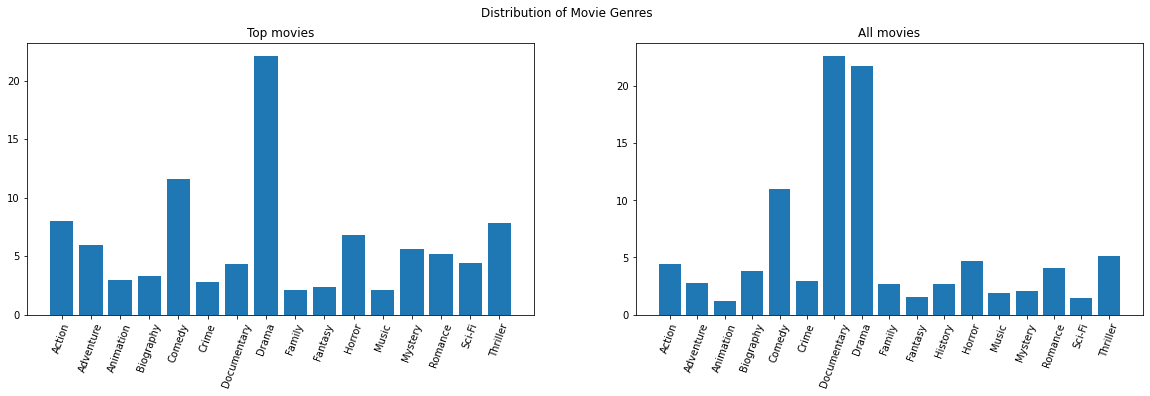

In [48]:
fig, (ax_top, ax_gen) = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Distribution of Movie Genres')

top_genre_counts_keys = list(top_genre_counts.keys())
top_genre_counts_values = list(top_genre_counts.values())
gen_genre_counts_keys = list(gen_genre_counts.keys())
gen_genre_counts_values = list(gen_genre_counts.values())

ax_top.bar(x=top_genre_counts_keys, height=top_genre_counts_values)
ax_top.set_title('Top movies')
ax_top.set_xticklabels(labels=list(top_genre_counts_keys), rotation=70)

ax_gen.bar(x=gen_genre_counts_keys, height=gen_genre_counts_values)
ax_gen.set_title('All movies');
ax_gen.set_xticklabels(labels=list(gen_genre_counts_keys), rotation=70);


## Make it pretty!
**Grouped barplots with Seaborn**

It seems like it's going to be easier if all our data is in a Pandas DataFrame first.

In [49]:
comparing_genres_df = pd.DataFrame.from_dict(top_genre_counts, orient='index', columns=['percentage'])
comparing_genres_df.reset_index(inplace=True)
comparing_genres_df.rename(columns={'index': 'genres'}, inplace=True)
comparing_genres_df['type'] = 'top'
comparing_genres_df

,genres,percentage,type
0,Action,8.011869,top
1,Adventure,5.934718,top
2,Animation,2.967359,top
3,Biography,3.264095,top
4,Comedy,11.572700,top
5,Crime,2.818991,top
6,Documentary,4.302671,top
7,Drama,22.106825,top
8,Family,2.077151,top
9,Fantasy,2.373887,top


In [50]:
all_genres = pd.DataFrame.from_dict(gen_genre_counts, orient='index', columns=['percentage'])
all_genres.reset_index(inplace=True)
all_genres.rename(columns={'index': 'genres'}, inplace=True)
all_genres['type'] = 'all'
all_genres

,genres,percentage,type
0,Action,4.454816,all
1,Adventure,2.792375,all
2,Animation,1.199239,all
3,Biography,3.813965,all
4,Comedy,11.021678,all
5,Crime,2.934932,all
6,Documentary,22.614463,all
7,Drama,21.732360,all
8,Family,2.712542,all
9,Fantasy,1.518129,all


In [51]:
comparing_genres_df = comparing_genres_df.append(all_genres)
comparing_genres_df

,genres,percentage,type
0,Action,8.011869,top
1,Adventure,5.934718,top
2,Animation,2.967359,top
3,Biography,3.264095,top
4,Comedy,11.572700,top
5,Crime,2.818991,top
6,Documentary,4.302671,top
7,Drama,22.106825,top
8,Family,2.077151,top
9,Fantasy,2.373887,top


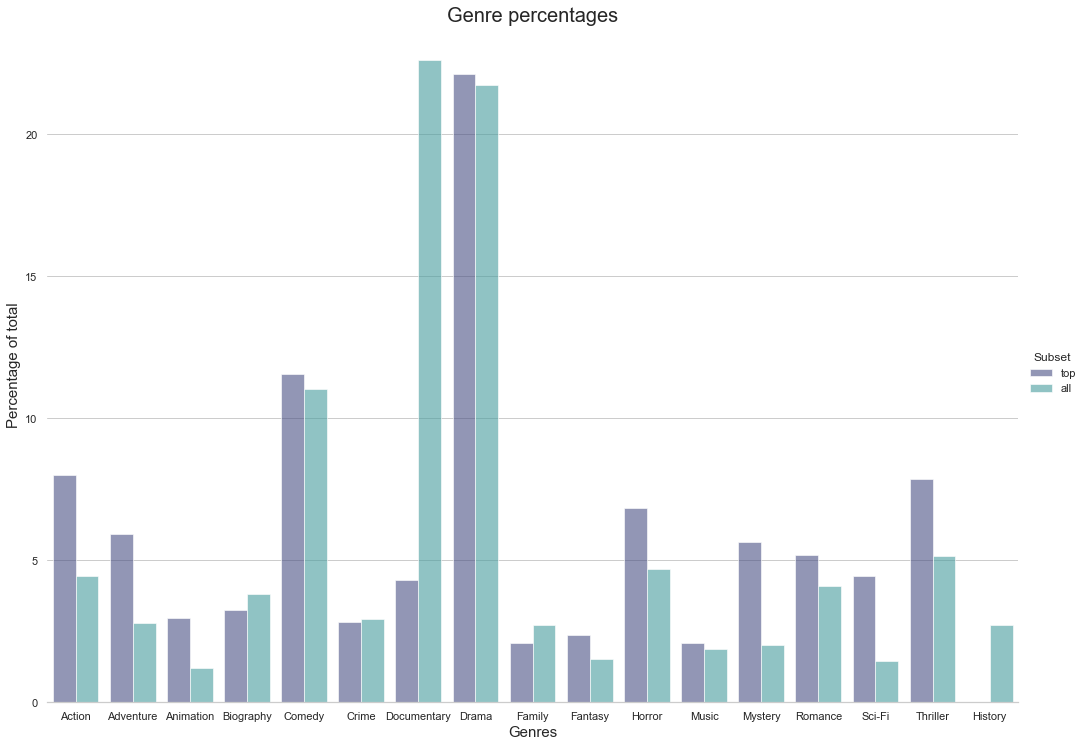

In [52]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Draw a nested barplot by percentage and (sub)set
g = sns.catplot(
    data=comparing_genres_df, kind="bar",
    x="genres", y="percentage", hue="type", 
    palette="mako", alpha=.6, height=10, aspect=11.7/8.27
)
g.despine(left=True)
g.set_axis_labels("Genres", "Percentage of total", size=15)
plt.title("Genre percentages", size=20)
g.legend.set_title("Subset");

This graph clearly shows that while documentaries are overall very common, they aren't common among successful (i.e., money-making) movies. Dramas are most commonly successful ("Drama" seems like an almost default, genre-less genre), while comedy, action/adventure, and thriller/horror/mystery are also common.

Converting a text files and Series into dictionaries, then back into a DataFrame seems like a very inefficient way to accomplish this.

**Note:** This was accomplished more simply in our final notebook.

## Scraping MPAA ratings from IMDB
***Need to use concurrent.futures so it doesn't take 40 hours***

In [149]:
# from bs4 import BeautifulSoup
# import requests
# import concurrent.futures

Testing on an individual page:

In [150]:
# html_page = requests.get('https://www.imdb.com/title/tt0069049/') # Make a get request to retrieve the page
# soup = BeautifulSoup(html_page.content, 'html.parser') # Pass the page contents to beautiful soup for parsing

`<span class="TitleBlockMetaData__ListItemText-sc-12ein40-2 jedhex">G</span>`

In [151]:
# # find a list of all span elements
# spans = soup.find_all('span', {'class' : 'TitleBlockMetaData__ListItemText-sc-12ein40-2 jedhex'})

# # create a list of lines corresponding to element texts
# ratings = [span.get_text() for span in spans][1]
# ratings

'R'

In [152]:
# # Construct list of urls to scrape
# urls = []
# tconst_list = list(title_basics_df.tconst)
# for tconst in tconst_list:
#     urls.append("https://www.imdb.com/title/{}/".format(tconst))

Building the functions and list to scale:

In [156]:
# # Define functions for scraping rating from given IMDB movie page
# def retrieve_rating(soup):
#     spans = soup.find_all('span', {'class' : 'TitleBlockMetaData__ListItemText-sc-12ein40-2 jedhex'})
#     return [span.get_text() for span in spans][1]

# # Scrape each page
# def scrape_for_rating(movies_list):
#     mpaa_ratings = {}
#     for movie in movies_list:
#         try:
#             url = "https://www.imdb.com/title/{}/".format(movie)
#             html_page = requests.get(url)
#             soup = BeautifulSoup(html_page.content, 'html.parser')
#             rating = retrieve_rating(soup)
#             if rating:
#                 print(rating)
#                 mpaa_ratings[movie] = rating
#             time.sleep(0.25)
#         except:
#             continue
            
#     return mpaa_ratings

In [ ]:
# # Source code from https://beckernick.github.io/faster-web-scraping-python/
# with concurrent.futures.ThreadPoolExecutor() as executor:
#         executor.map(scrape_for_rating, urls[:10])

In [ ]:
# Source code from https://medium.com/@apbetahouse45/asynchronous-web-scraping-in-python-using-concurrent-module-a5ca1b7f82e4

# import time
# import requests
# from bs4 import BeautifulSoup
# from concurrent.futures import ProcessPoolExecutor, as_completed
# URLs = [ ... ] # A long list of URLs.
# def parse(url):
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, 'lxml')
#     return soup.find_all('a')
# with ProcessPoolExecutor(max_workers=4) as executor:
#     start = time.time()
#     futures = [ executor.submit(parse, url) for url in URLs ]
#     results = []
#     for result in as_completed(futures):
#         results.append(result)
#     end = time.time()
#     print("Time Taken: {:.6f}s".format(end-start))